# Método de Runge-Kutta para EDO de primer orden


**Ejemplo 1:** Resolver en python la siguiente ecuación diferencial: \\
dy/dx = (1+2x)\sqrt{y}, y(0) = 1 \\
Graficar para 0<=x<=1: \\
a) Solución analítica.  \\
b) Solución numérica por *método de Euler* con h = 0.01 \\
c) Solución numérica por *método del punto medio* con h = 0.01 \\
d) Solución numérica por *método del RK4* con h = 0.01

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def f(x,y):
    return (1+2*x)*np.sqrt(y)

In [32]:
# Solución analítica: y = (1/4)(2+x+x^2)^2

h=0.01
x=0
y=1
X=[x]
Y_exact=[y]
while x<=1:
    Y_exact.append((2+x+x**2)**2/4)
    x+=h
    X.append(x)


In [33]:
# Solución por método de Euler:

h=0.01
x=0
y=1
X=[x]
Y_euler=[y]

while x<=1:
    y+=f(x,y)*h
    x+=h
    X.append(x)
    Y_euler.append(y)



In [34]:
# Solución por método del punto medio:

h=0.01
x=0
y=1
X=[x]
Y_medio=[y]

while x<=1:
    k1=f(x,y)
    k2=f(x+0.5*h,y+0.5*k1*h)
    y+=k2*h
    x+=h
    X.append(x)
    Y_medio.append(y)


In [37]:
# Solución por método de RK4:

h=0.01
x=0
y=1
X=[x]
Y_RK4=[y]
while x<=1:
    k1=f(x,y)
    k2=f(x+0.5*h,y+0.5*k1*h)
    k3=f(x+0.5*h,y+0.5*k2*h)
    k4=f(x+h,y+k3*h)
    y+=(k1+2*k2+2*k3+k4)*h/6
    x+=h
    X.append(x)
    Y_RK4.append(y)



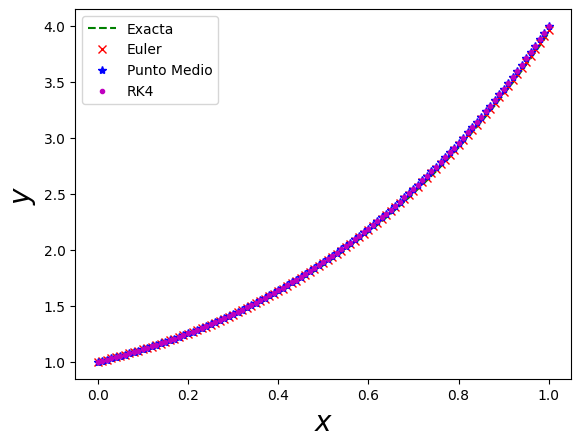

In [38]:
# Gráficas:

plt.plot(X,Y_exact,'g--',label='Exacta')
plt.plot(X,Y_euler,'rx',label='Euler')
plt.plot(X,Y_medio,'b*',label='Punto Medio')
plt.plot(X,Y_RK4,'m.',label='RK4')
plt.xlabel(r'$x$',size=20)
plt.ylabel(r'$y$',size=20)
plt.legend(loc='upper left')
plt.show()

**Ejemplo 2:** Resolver la siguiente ecuación diferencial: \\
dy/dx = (1+2x)y^(sin(xy)), y(0) = 1 \\
Graficar para 0<=x<=3: \\
a) Solución numérica por *método de RK4* con h = 0.001 \\
b) Solución numérica por *método de RK4* con h = 0.01 \\
c) Solución numérica por *método de RK4* con h = 0.1 \\
d) Solución numérica por *método de RK4* con h = 0.5

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return (1+2*x)*y**(np.sin(x*y))

def RK4(x0,y0,xmax,h):
  x = x0
  y = y0
  X=[x]
  Y_RK4=[y]
  while x<=xmax:
    k1 = f(x,y)
    k2 = f(x+0.5*h,y+0.5*k1*h)
    k3 = f(x+0.5*h,y+0.5*k2*h)
    k4 = f(x+h,y+k3*h)
    y += (k1+2*k2+2*k3+k4)*h/6
    x += h
    X.append(x)
    Y_RK4.append(y)
  plt.plot(X,Y_RK4,'r-', label = f"{h}")
  plt.legend(loc = "upper left")
  plt.xlabel(r'$x$',size=20)
  plt.ylabel(r'$y$',size=20)
  plt.show()

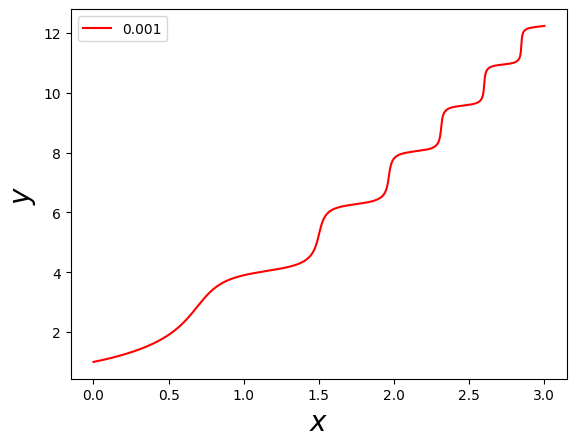

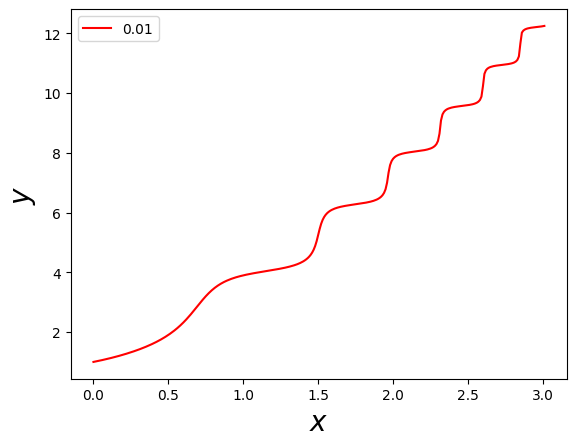

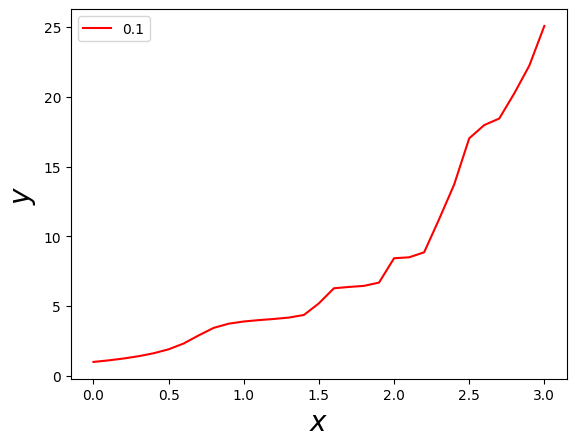

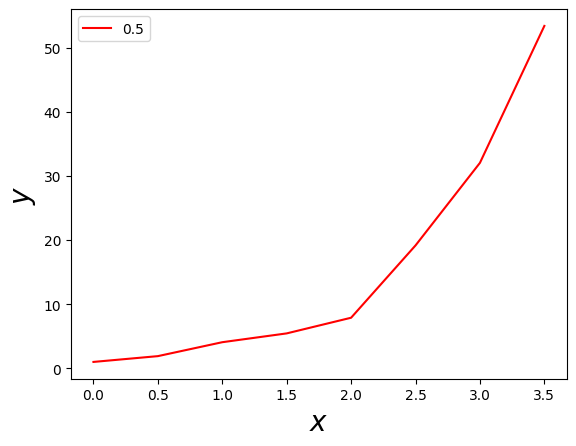

In [3]:
h=[0.001,0.01,0.1,0.5]

for i in h:
  RK4(0,1,3,i)

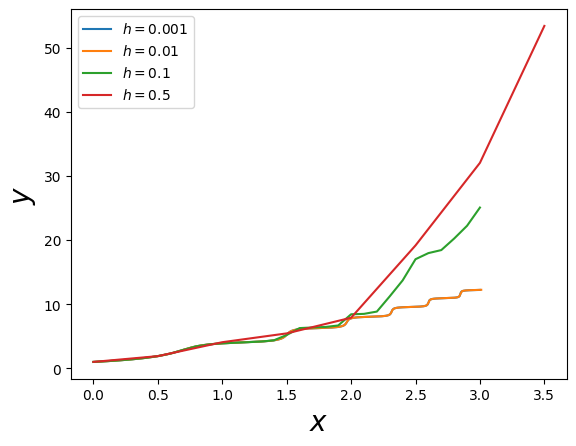

In [11]:
# OTRA MANERA DE HACERLO (HECHO POR EL PROFESOR):

def RK4(x0,y0,xmax,h):
  x = x0
  y = y0
  X=[x]
  Y=[y]
  while x<=xmax:
    k1 = f(x,y)
    k2 = f(x+0.5*h,y+0.5*k1*h)
    k3 = f(x+0.5*h,y+0.5*k2*h)
    k4 = f(x+h,y+k3*h)
    y += (k1+2*k2+2*k3+k4)*h/6
    x += h
    X.append(x)
    Y.append(y)
  return X,Y

X,Y=RK4(0,1,3,0.001)
plt.plot(X,Y,label=r'$h=0.001$')
X,Y=RK4(0,1,3,0.01)
plt.plot(X,Y,label=r'$h=0.01$')
X,Y=RK4(0,1,3,0.1)
plt.plot(X,Y,label=r'$h=0.1$')
X,Y=RK4(0,1,3,0.5)
plt.plot(X,Y,label=r'$h=0.5$')
plt.xlabel(r'$x$',size=20)
plt.ylabel(r'$y$',size=20)
plt.legend(loc='upper left')
plt.show()